## 12 Random Forest 

#### Dataset Description:
Use the Glass dataset and apply the Random forest model.

##### 1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.


In [1]:
import pandas as pd  #import libraries 
import numpy as np 
df = pd.read_excel("glass.xlsx", sheet_name=1) #load dataset
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
df.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
df.describe().T #statistical summary of numerical columns

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [4]:
df.duplicated().value_counts() #check duplicates

False    213
True       1
Name: count, dtype: int64

In [5]:
df.drop_duplicates(inplace=True) #remove duplicates

In [6]:
df.duplicated().value_counts() #check duplicate again 

False    213
Name: count, dtype: int64

In [7]:
df.isnull().sum() #check null values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
for col in df.columns :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    outliers = df[(df[col] < lower_bound) | df[col] > upper_bound] #detect outliers 
    print (f'{col} : {len(outliers)} outliers')
    # df = df[(df[col] >= lower_bound) & (df[col]<= upper_bound)] # we cannot drop ourliers b'cuz it's causes heavy data loss
    df[col] = df[col].apply(lambda x: max(min(x , upper_bound), lower_bound)) #using capping to prevent data loss

RI : 0 outliers
Na : 0 outliers
Mg : 0 outliers
Al : 0 outliers
Si : 0 outliers
K : 0 outliers
Ca : 0 outliers
Ba : 38 outliers
Fe : 70 outliers
Type : 0 outliers


In [9]:
df.shape #chake dataset's shape after handling outliers 

(213, 10)

In [10]:
df.dtypes #check datatypes of all columns

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type    float64
dtype: object

#### 2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.


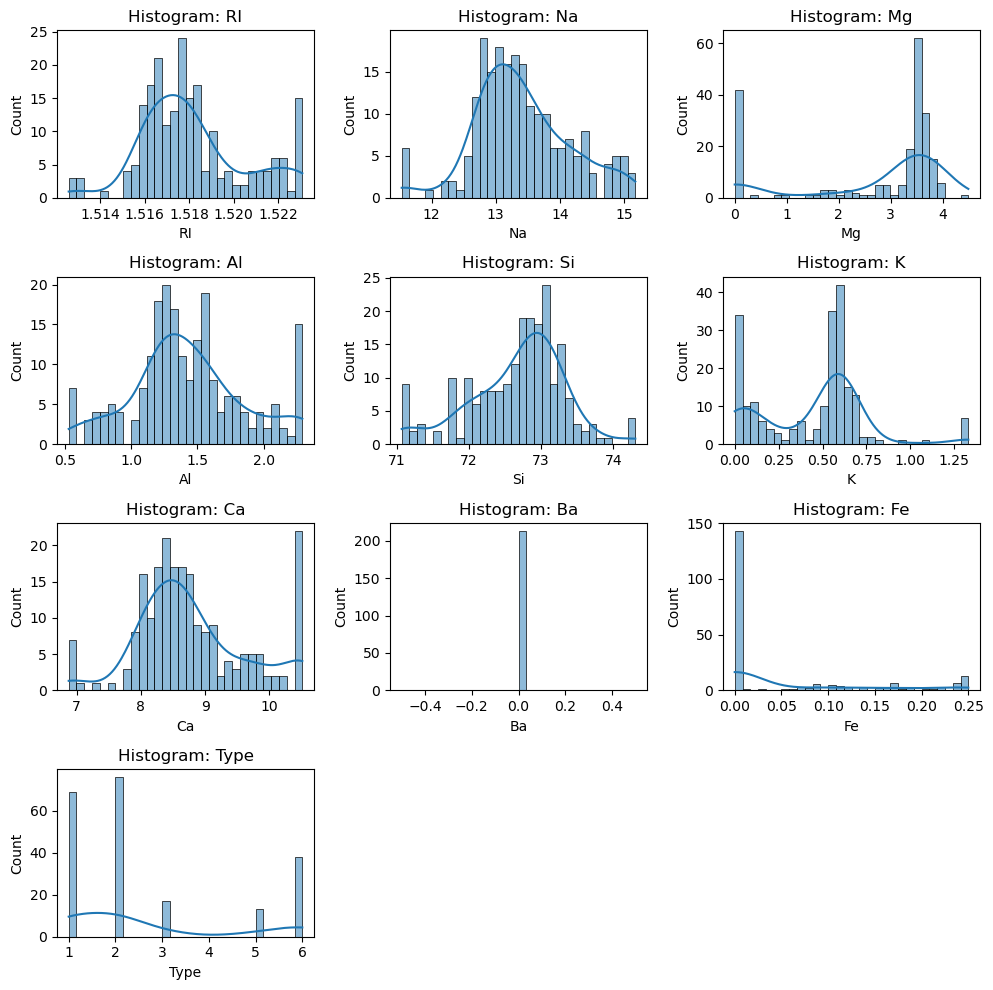

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=[np.number]).columns.tolist() #Find Numerical Columns 
plt.figure(figsize=(10,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4,3, i)
    sns.histplot(df[col], kde=True, bins=30) #Plot Histplot Of Each Numerical Columns TO identify Features Distributions
    plt.title(f"Histogram: {col}")
plt.tight_layout()
plt.show()

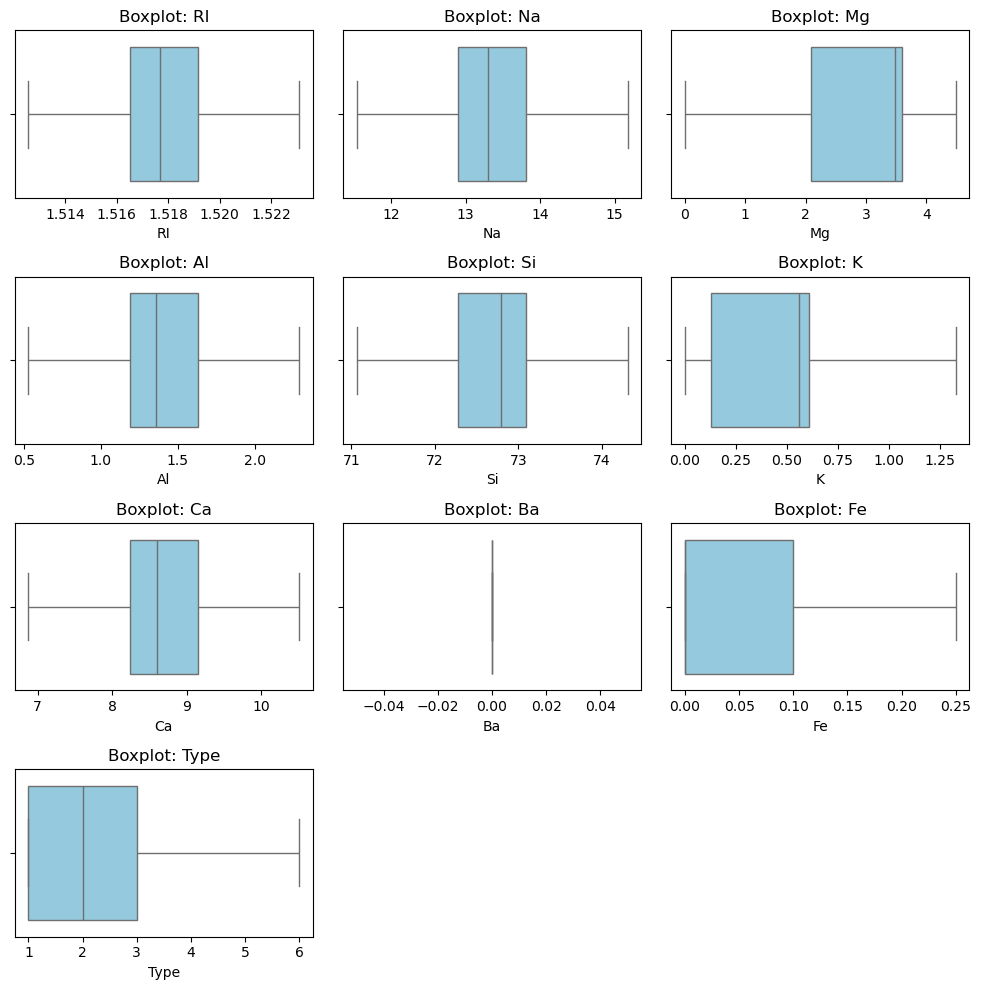

In [12]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], color="skyblue")  #Plot Boxplot For Outlier Detection 
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

<Axes: >

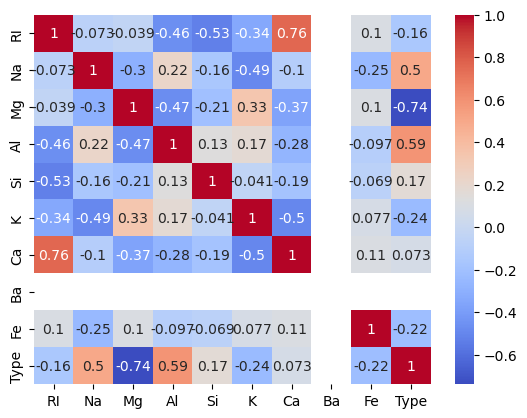

In [13]:
sns.heatmap(df.corr(numeric_only=True) , annot=True, cmap="coolwarm") #check correlations between numerical columns

In [14]:
x = df.drop("Type", axis=1) #split data into x and y 
y = df['Type']

### 3: Data Preprocessing

- 1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
- 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
- 3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [15]:
from sklearn.preprocessing import StandardScaler #import standard scaler
ss = StandardScaler()
x_sc = ss.fit_transform(x) #apply standard scaler on all columns b'cuz all columns are numerical 

<Axes: xlabel='Type', ylabel='count'>

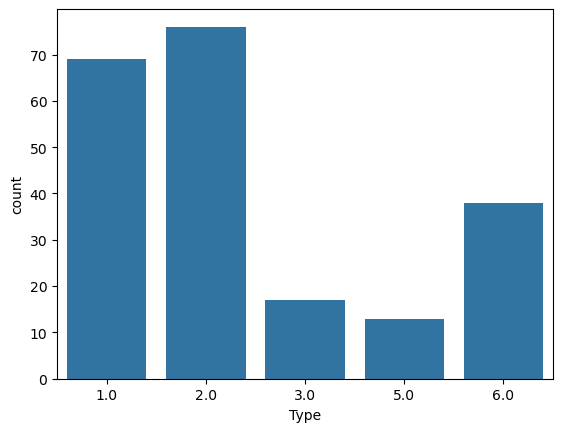

In [16]:
sns.countplot(x=y) # check data is balance or imbalance 

### 4: Random Forest Model Implementation
- 1. Divide the data into train and test split.

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=42, stratify=y) #use train test split for split data

- 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

In [18]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
rfc = RandomForestClassifier(n_estimators=50) 
rfc.fit(x_train, y_train) # train random forest model on training data 

RandomForestClassifier(n_estimators=50)

In [19]:
y_pred = rfc.predict(x_test) #mmodel makes predictions

- 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [20]:
from sklearn.metrics import classification_report , confusion_matrix, f1_score, recall_score, precision_score, roc_curve,roc_auc_score,accuracy_score #import metrics

recall = recall_score(y_test, y_pred, average='weighted') #Calculate Weighted Recall Score
print("Weighted Recall:", np.round(recall, 2))

precision = precision_score(y_test, y_pred, average='weighted') # Calculate Weighted precision
print("Weighted Precision:", np.round(precision, 2))

f1 = f1_score(y_test, y_pred, average='weighted') # Calculate Weighted F1-score
print("Weighted F1-score:", np.round(f1, 2))


cm = confusion_matrix(y_test,y_pred) #For Cunfusion matrix
cm

Weighted Recall: 0.86
Weighted Precision: 0.87
Weighted F1-score: 0.86


array([[13,  1,  0,  0,  0],
       [ 2, 12,  0,  0,  1],
       [ 1,  0,  2,  0,  0],
       [ 0,  1,  0,  2,  0],
       [ 0,  0,  0,  0,  8]], dtype=int64)

<Axes: >

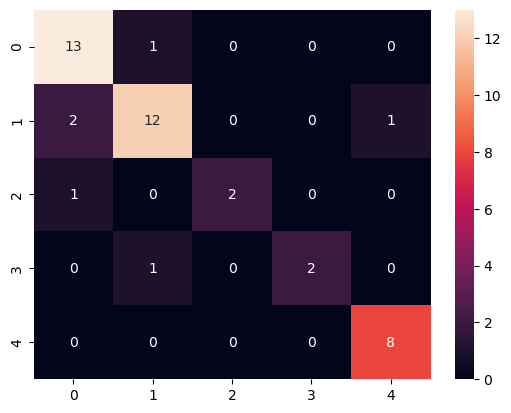

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True) # heatmap of confusion matrix 

### 5: Bagging and Boosting Methods
- Apply the Bagging and Boosting methods and compare the results.

In [22]:
bagging = BaggingClassifier(estimator=RandomForestClassifier(random_state=42), n_estimators=100, random_state=42) 

bagging.fit(x_train, y_train) #training bagging model on training data
y_pred_bag = bagging.predict(x_test) #bagging model makes predictions

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag)) 
print("Bagging F1-score:", f1_score(y_test, y_pred_bag, average='weighted'))

Bagging Accuracy: 0.813953488372093
Bagging F1-score: 0.8118307467333366


In [23]:
boosting = AdaBoostClassifier( n_estimators=50, learning_rate=0.1, random_state=42)

boosting.fit(x_train, y_train) #training adaboost model on training data
y_pred_ada = boosting.predict(x_test) #adaboost model makes predictions

print("Boosting Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Boosting F1-score:", f1_score(y_test, y_pred_bag, average='weighted'))

Boosting Accuracy: 0.3488372093023256
Boosting F1-score: 0.8118307467333366


C:\Users\shivi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [24]:
rf_acc = accuracy_score(y_test, y_pred)
rf_prec = precision_score(y_test, y_pred, average='weighted')
rf_rec = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')

ada_acc = accuracy_score(y_test, y_pred_ada)
ada_prec = precision_score(y_test, y_pred_ada, average='weighted')
ada_rec = recall_score(y_test, y_pred_ada, average='weighted')
ada_f1 = f1_score(y_test, y_pred_ada, average='weighted') 

bag_acc = accuracy_score(y_test, y_pred_bag)
bag_prec = precision_score(y_test, y_pred_bag, average='weighted')
bag_rec = recall_score(y_test, y_pred_bag, average='weighted')
bag_f1 = f1_score(y_test, y_pred_bag, average='weighted')

C:\Users\shivi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1200x600 with 0 Axes>

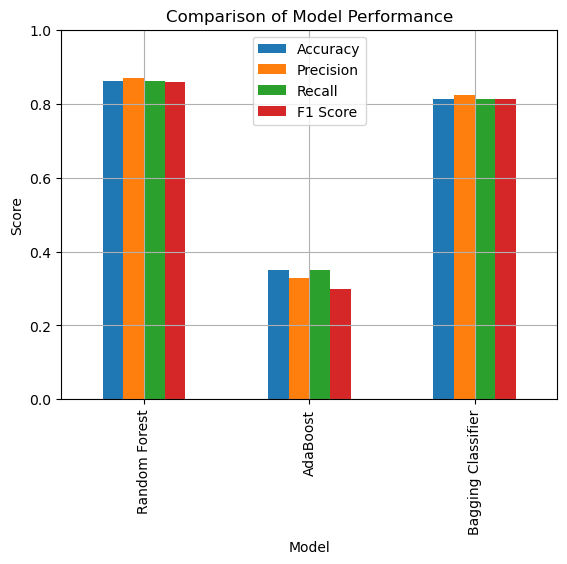

In [25]:
results = {
    "Model": ["Random Forest", "AdaBoost", "Bagging Classifier"],
    "Accuracy": [rf_acc, ada_acc, bag_acc],
    "Precision": [rf_prec, ada_prec, bag_prec],
    "Recall": [rf_rec, ada_rec, bag_rec],
    "F1 Score": [rf_f1, ada_f1, bag_f1]
} #make dictionary of all results 

results_df = pd.DataFrame(results) #make dataframe into dictionary 

plt.figure(figsize=(12,6))
results_df.set_index("Model").plot(kind='bar') # Barplot of metrics
plt.title("Comparison of Model Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

### Additional Notes:
- 1. Explain Bagging and Boosting methods. How is it different from each other.

#### Bagging

##### Definition:
-  Bagging is an ensemble technique that builds multiple independent models (usually decision trees) on random subsets of the training data (sampled with replacement), 
-  and averages or votes their predictions.

##### Key Points:
- Reduces variance (overfitting).
- Models are trained in parallel.
- Common algorithm: Random Forest.
- Good when base learners (like decision trees) have high variance.

#### Boosting

##### Definition:
- Boosting is an ensemble method that builds models sequentially, each trying to correct the mistakes of the previous one.

##### Key Points:
- Reduces bias and variance.
- Models are trained sequentially.
- Later models focus more on misclassified samples.
- Common algorithms:
- AdaBoost (Adaptive Boosting)
- Gradient Boosting
- XGBoost, LightGBM, CatBoost

- 2. Explain how to handle imbalance in the data.

#### 1. Resampling Methods

##### a) Oversampling the Minority Class
- Duplicate or synthetically generate new minority samples.
- Popular method: SMOTE (Synthetic Minority Over-sampling Technique)
    - from imblearn.over_sampling import SMOTE
    - smote = SMOTE(random_state=42)
    - X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

##### b) Undersampling the Majority Class
- Randomly remove samples from the majority class.
    - from imblearn.under_sampling import RandomUnderSampler
    - rus = RandomUnderSampler(random_state=42)
    - X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

#### 2. Using Class Weights
- Tell the algorithm to give more importance to minority classes.
    - from sklearn.ensemble import RandomForestClassifier
    - model = RandomForestClassifier(class_weight='balanced')
    -  model.fit(X_train, y_train)

#### 3. Anomaly Detection Models
- If the minority class is extremely rare (like fraud detection), treat it as an anomaly detection problem using:
    - Isolation Forest
    - One-Class SVM

#### 4. Evaluation Metrics
- Avoid using accuracy alone—it can be misleading.
- Use metrics better suited for imbalanced data:
    - Precision, Recall
    - F1-Score
    - ROC-AUC Score
    - Confusion Matrix
- from sklearn.metrics import classification_report, roc_auc_score
- print(classification_report(y_test, y_pred))
- print("ROC-AUC:", roc_auc_score(y_test, y_prob))